In [1]:
import pandas as pd
df = pd.read_csv("../data/raw/noshowappointments.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
# Overall info
df.info()

# How many no-shows vs shows?
df['No-show'].value_counts(), df['No-show'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(No-show
 No     88208
 Yes    22319
 Name: count, dtype: int64,
 No-show
 No     0.798067
 Yes    0.201933
 Name: proportion, dtype: float64)

In [3]:
import numpy as np

# Drop obviously wrong ages (negative)
df = df[df['Age'] >= 0]

# Convert to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Feature: number of days between scheduling and appointment
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Feature: day of week name for appointment
df['ApptWeekday'] = df['AppointmentDay'].dt.day_name()

df[['Age', 'ScheduledDay', 'AppointmentDay', 'WaitingDays', 'ApptWeekday']].head()


,Age,ScheduledDay,AppointmentDay,WaitingDays,ApptWeekday
0,62,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1,Friday
1,56,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1,Friday
2,62,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1,Friday
3,8,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1,Friday
4,56,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1,Friday


In [4]:
# Binary target: 1 = no-show, 0 = showed up
df['NoShow'] = (df['No-show'] == "Yes").astype(int)

df['NoShow'].value_counts(), df['NoShow'].value_counts(normalize=True)


(NoShow
 0    88207
 1    22319
 Name: count, dtype: int64,
 NoShow
 0    0.798066
 1    0.201934
 Name: proportion, dtype: float64)

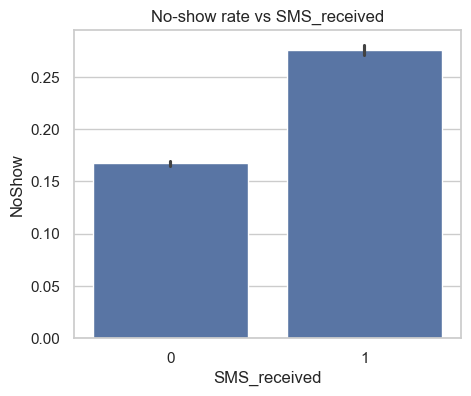

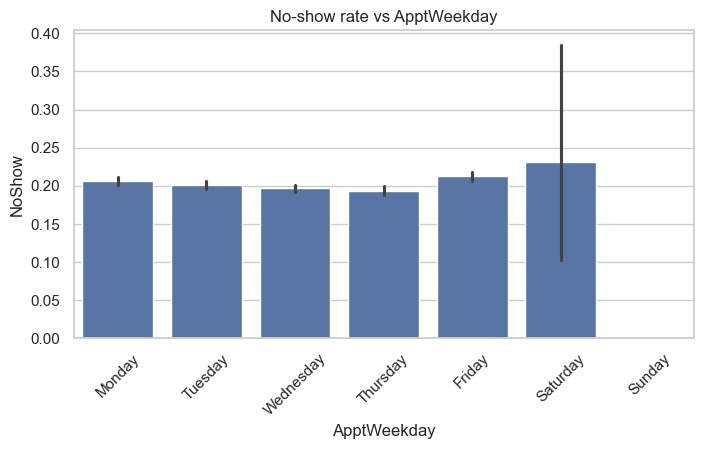

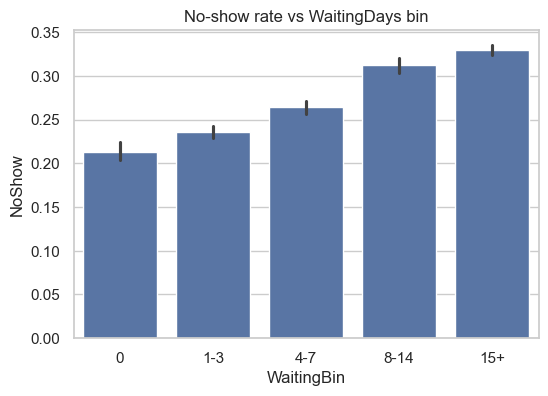

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# No-show rate by SMS_received
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='SMS_received', y='NoShow')
plt.title("No-show rate vs SMS_received")
plt.show()

# No-show rate by day of week
plt.figure(figsize=(8,4))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(data=df, x='ApptWeekday', y='NoShow', order=order)
plt.title("No-show rate vs ApptWeekday")
plt.xticks(rotation=45)
plt.show()

# Relationship with WaitingDays (binned)
df['WaitingBin'] = pd.cut(df['WaitingDays'], bins=[-1,0,3,7,14,60], labels=['0','1-3','4-7','8-14','15+'])
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='WaitingBin', y='NoShow')
plt.title("No-show rate vs WaitingDays bin")
plt.show()
